In [5]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt

In [6]:
data=pd.read_excel('icecream.xlsx')
data

,Student_Population,Sales
0,2,58
1,6,105
2,8,88
3,8,118
4,12,117
5,16,137
6,20,157
7,20,169
8,22,149
9,26,202


In [10]:
Reg1=ols(formula='Sales ~ Student_Population',data=data).fit()
Reg1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Sun, 08 Mar 2020   Prob (F-statistic):           2.55e-05
Time:                        23:46:53   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             60.0000      9.226      6.503      0.000      38.725      81.275
Student_Population     5.0000      0.580      8.617      0.000       3.662       6.338
==============================================================================
Omnibus:                        0.928   Durbin-Watson:                   3.224
Prob(Omnibus):                  0.629   Jarque-Bera (JB):                0.616
Skew:                          -0.060   Prob(JB):                        0.735
Kurtosis:                       1.790   Cond. No.                         33.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
anova_lm(Reg1)

,df,sum_sq,mean_sq,F,PR(>F)
Student_Population,1.0,14200.0,14200.00,74.248366,0.000025
Residual,8.0,1530.0,191.25,NaN,NaN


Text(0, 0.5, 'Residue')

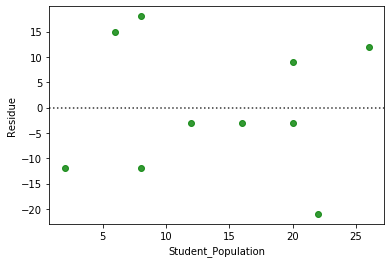

In [13]:
import seaborn as sns
sns.residplot(data['Student_Population'],data['Sales'],color='green')
plt.ylabel('Residue')

In [15]:
influence=Reg1.get_influence()
resid_student=influence.resid_studentized_external
resid_student

array([-1.09212653,  1.26798654, -0.94196706,  1.54023214, -0.21544891,
       -0.21544891, -0.22263461,  0.68766487, -2.01063738,  1.09212653])

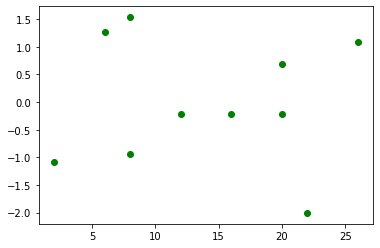

In [16]:
plt.figure()
plt.scatter(data['Student_Population'],resid_student,color='green')

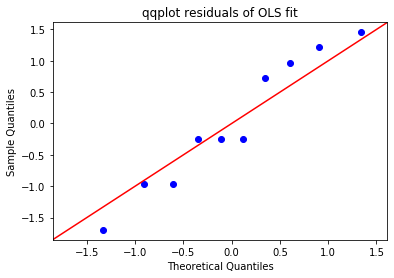

In [17]:
from scipy import stats
import statsmodels.api as sm
res=Reg1.resid
probplot=sm.ProbPlot(res,stats.norm,fit=True)
fig=probplot.qqplot(line='45')
h=plt.title('qqplot residuals of OLS fit')
plt.show()